# POMDPs

> Partially Observable Markov Decision Processes

- toc: true
- layout: post
- categories: [pomdps]

## What are POMDPs?

After browsing around I have determined the POMDPs are not the easiest thing to explain or understand. So I wanted to write a gentle background that could help me, and maybe others, understand it better.

At a high level, agents interact with their environments and make decisions in order to maximize their reward. However in the real world, decision makers rarely (never) have perfect insight into the state of their environment. Thus the *partially observable* part of the name.

So, agents maintain a probability distribution of the environment they are a part of (called the belief state), and each possible state of the environment has associated actions (with their own rewards and effects on the environment) as well as observations (feedback that the agent receives as to the current state).

## How are they useful?

POMDPs have proven useful for ML/AI applications, specifically reinforcement learning and healthcare:

### Reinforcement Learning

POMDPs can be used to guide the learning agent's actions. If you think about it intuitively, RL environments and POMDPs both involve:

- An external environment (i.e., the agent's effects on the environment are negligible)
- An agent seeking to maximize some reward function
- Imperfect information about the world

Then hopefully, we can find the optimal policy for the agent to act upon.

### Healthcare

Since a patient's condition often manifests as nonspecific symptoms, doctors have limited insight into the true underlying state the patient is in. By using readings, scans, and other proxy measurements, care providers are able to generate more observations and reduce the uncertainty in their belief state, or in other words, come from a differential diagnosis to a (specific) diagnosis.

Wikipedia provides a few other interesting examples:

- Management of patients with ischemic heart disease
- Assistive technology for persons with dementia

## Solving POMDPs

Solvers are of course concerned with finding the best possible action, in terms of maximized reward, given an "external" environment. There are a couple ways to solve POMDPs, mostly concerned with numerical solutions as opposed to analytical ones.

For all of them, or at least the ones listed below, we calculate a *value function* for each time horizon to calculate the reward at $t = 1, 2, 3, ...$ . This value function maps from the belief state onto $\mathbb{R}$, representing the reward of a particular action for a particular belief state. Essentially, each action's reward function is piecewise-linear-convex, and the value function simply takes the maximum.

(R code shown below)

In [1]:
library(tidyverse)
library(pomdp)

theme_set(theme_minimal())

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



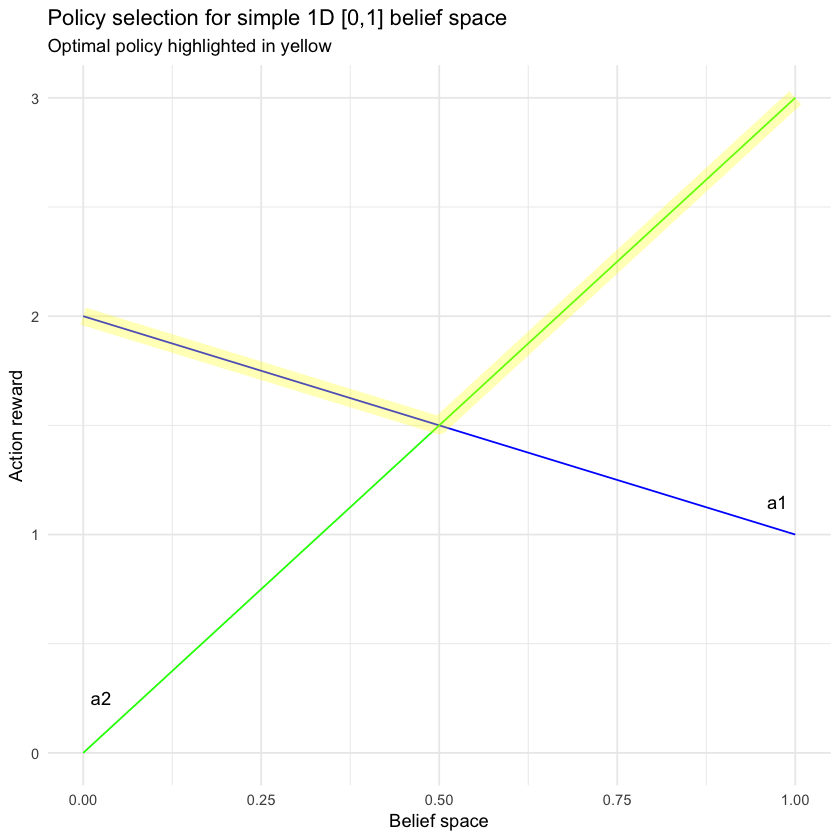

In [2]:
f1 <- function(x) 2 - x
f2 <- function(x) 3 * x
f_max <- function(x) {
  pmax(approxfun(x, f1(x))(x), approxfun(x, f2(x))(x))
}

ggplot(data.frame(x = c(0, 1)), aes(x = x)) +
  stat_function(fun = f1, color = "blue") +
  annotate("text", x = 0.975, y = 1.15, label = "a1") +
  stat_function(fun = f2, color = "green") +
  annotate("text", x = 0.025, y = 0.25, label = "a2") +
  stat_function(fun = f_max, color = "yellow", alpha = 0.3, size = 5) +
  labs(x = "Belief space", y = "Action reward",
       title = "Policy selection for simple 1D [0,1] belief space",
       subtitle = "Optimal policy highlighted in yellow")

#### 1. Value iteration

Starting at $t = 1$, we build up one period at a time until we reach our desired time horizon. Over a long enough time span, these value functions should converge.

#### 2. Policy iteration

Pick a policy and calculate the value function. Use a [Bellman equation](https://en.wikipedia.org/wiki/Bellman_equation) to update the value function towards optimality, and then update the policy.

#### 3. Witness algorithm

There's a succinct description [here](http://www.pomdp.org/tutorial/witness.html):

> It concentrates on finding the best value function $v$ for each action separately. Once it finds these, it will combine them into the final $v'$ value function [to use for some belief region]. 

#### 4. Heuristic Search Value Iteration (HSVI)

HSVI uses a tree search and heuristics, based on the based on upper and lower bounds of the optimal value function, to guide local updates. You can read more in the [paper on arXiv](https://arxiv.org/pdf/1207.4166.pdf).

## Working with them computationally

There's a `pomdp` package available on [CRAN](https://cran.r-project.org/web/packages/pomdp/index.html) and [Github](https://github.com/farzad/pomdp), courtesy of Hossein Kamalzadeh, Michael Hahsler, and Anthony Cassandra. It provides the following example usage:

In [3]:
data("Tiger")
sol <- solve_POMDP(Tiger)
sol
sol$solution

Warning message in data("Tiger"):
“data set ‘Tiger’ not found”


ERROR: Error in write_POMDP(model, pomdp_filename): object 'Tiger' not found


So in essence, we provide the details of the environment and the rewards of actions, and receive back a solution policy to direct our decisions.

There's a lot more to explore here, and I'm interested in seeing how this area interacts with the renewed focus on reinforcement learning research. 

## Want to learn more? (Resources)

Following are the resources I've learned from, and are a good starting point if you're interested in learning more:

- [Wikipedia](https://en.wikipedia.org/wiki/Partially_observable_Markov_decision_process)
- [POMDPs for Dummies](http://www.pomdp.org/tutorial/)
- [A tutorial on partially observiable Markov decision processes](https://www.sciencedirect.com/science/article/abs/pii/S0022249609000042)
- [Geoff Hollinger's lecture](https://www.cs.cmu.edu/~ggordon/780-fall07/lectures/POMDP_lecture.pdf)
- [Sachin Patil's lecture](https://people.eecs.berkeley.edu/~pabbeel/cs287-fa13/slides/pomdps.pdf)
- [A brief introduction to RL](https://www.cs.ubc.ca/~murphyk/Bayes/pomdp.html)